In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [41]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_boston
from sklearn import tree



In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

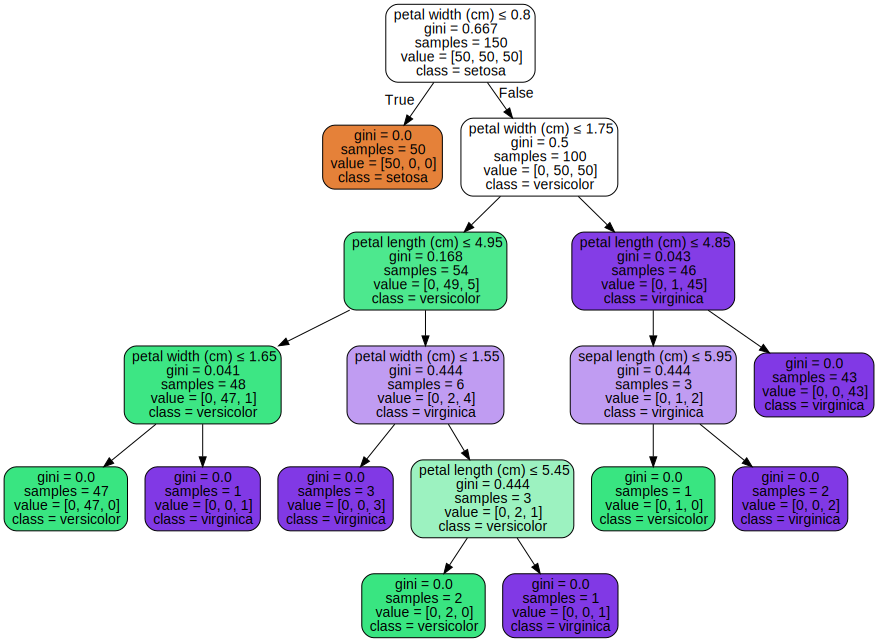

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph


In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [18]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [21]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
white['score'] = np.where(white['quality'] >= 6, 1, 0)
red['score'] = np.where(red['quality'] >= 6, 1, 0)

In [42]:
y_white = white['score']

x_white = white[white.columns.difference(['quality', 'score'])]


In [46]:
y_red = red['score']

x_red = red[red.columns.difference(['quality', 'score'])]

In [47]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(x_red, 
                                                                        y_red, 
                                                                        test_size = 0.20)

In [23]:
from sklearn.model_selection import train_test_split

In [31]:
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(x_white, 
                                                                        y_white, 
                                                                        test_size = 0.20)

In [53]:
wijnen = pd.read_csv('wijnen.csv')

In [54]:
y_wijnen = wijnen['type']
x_wijnen = wijnen[wijnen.columns.difference(['type'])]

In [56]:
del x_wijnen['Unnamed: 0']

In [60]:
X_wijn_train, X_wijn_test, y_wijn_train, y_wijn_test = train_test_split(x_wijnen, 
                                                                        y_wijnen, 
                                                                        test_size = 0.20)

# White wine 

In [48]:
clf_red = tree.DecisionTreeClassifier()
clf_red = clf_red.fit(X_red_train, y_red_train)

In [49]:
columns = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity']
target = ['1', '0']


In [50]:
import graphviz 
dot_data = tree.export_graphviz(clf_red, out_file=None, 
                     feature_names=columns,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree_red.png'

# red wine

In [ ]:
clf_wijn = tree.DecisionTreeClassifier()
clf_wijn = clf_wijn.fit(X_red_train, y_red_train)

columns = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity']
target = ['1', '0']




import graphviz 
dot_data = tree.export_graphviz(clf_wijn, out_file=None, 
                     feature_names=columns,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# wine color 

In [ ]:
clf_wijn = tree.DecisionTreeClassifier()
clf_wijn = clf_red.fit(X_red_train, y_red_train)

columns = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity']
target = ['1', '0']




import graphviz 
dot_data = tree.export_graphviz(clf_red, out_file=None, 
                     feature_names=columns,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = columns,
                class_names = target,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')